In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_column', None)

In [2]:
df = pd.read_csv('../TAMU_FINAL_DATASET_2018/TAMU_FINAL_DATASET_2018.csv')

In [3]:
ami_1 = df[df['AMI_FLAG'] == 1]

In [4]:
len(ami_1)

2726

In [5]:
demographic_data = ['AGE', 'SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'INSTITUTIONAL','LIS', 'Est_Net_worth', 'Est_income', \
                   'Population_density_centile_ST','Population_density_centile_US', 'Education_level', 'Length_residence',\
                   'Num_person_household', 'College','Online_purchaser', 'Online_User', 'Pct_above_poverty_line',\
       'Pct_below_poverty_line', 'Dwelling_Type' ]

In [6]:
demograph_df = df[demographic_data]

In [81]:
demograph_df.shape

(87821, 20)

In [7]:
demograph_df.head()

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type
0,77,F,N,N,N,N,87500.0,87500.0,70.0,84.0,4.0,13.0,3.0,1.0,0.0,1.0,94.0,6.0,S
1,49,F,N,N,N,N,-2500.0,7500.0,83.0,86.0,3.0,3.0,3.0,0.0,1.0,1.0,86.0,14.0,T
2,75,F,N,N,N,N,625000.0,112000.0,30.0,30.0,6.0,8.0,1.0,1.0,0.0,1.0,95.0,5.0,A
3,68,M,N,N,N,N,-2500.0,55000.0,16.0,18.0,3.0,1.0,1.0,0.0,0.0,1.0,90.0,10.0,S
4,81,F,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
demograph_df.iloc[0]

AGE                                 77
SEX_CD                               F
ESRD_IND                             N
HOSPICE_IND                          N
INSTITUTIONAL                        N
LIS                                  N
Est_Net_worth                    87500
Est_income                       87500
Population_density_centile_ST       70
Population_density_centile_US       84
Education_level                      4
Length_residence                    13
Num_person_household                 3
College                              1
Online_purchaser                     0
Online_User                          1
Pct_above_poverty_line              94
Pct_below_poverty_line               6
Dwelling_Type                        S
clusterNo                            5
Name: 0, dtype: object

In [9]:
demograph_df.shape

(100000, 19)

In [14]:
## Removng the entries withNULL data for income and worth

In [13]:
demograph_df =demograph_df[~pd.isnull(demograph_df['Est_Net_worth'])]

In [16]:
demograph_df[['SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'INSTITUTIONAL', 'LIS']].describe()

,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS
count,87795,87794,87794,87795,87795
unique,2,2,2,2,2
top,F,N,N,N,N
freq,50029,87322,87428,87423,71407


In [17]:
demograph_df['SEX_CD'] = demograph_df['SEX_CD'].fillna('F')
demograph_df['ESRD_IND'] = demograph_df['ESRD_IND'].fillna('N')
demograph_df['HOSPICE_IND'] = demograph_df['HOSPICE_IND'].fillna('N')
demograph_df['INSTITUTIONAL'] = demograph_df['INSTITUTIONAL'].fillna('N')
demograph_df['LIS'] = demograph_df['LIS'].fillna('N')

In [18]:
demograph_df.isnull().sum()

AGE                              0
SEX_CD                           0
ESRD_IND                         0
HOSPICE_IND                      0
INSTITUTIONAL                    0
LIS                              0
Est_Net_worth                    0
Est_income                       0
Population_density_centile_ST    0
Population_density_centile_US    0
Education_level                  0
Length_residence                 0
Num_person_household             0
College                          0
Online_purchaser                 0
Online_User                      0
Pct_above_poverty_line           0
Pct_below_poverty_line           0
Dwelling_Type                    0
dtype: int64

In [27]:
cat_cols = ['College', 'Online_purchaser', 'Online_User','Dwelling_Type', 'Education_level',  'SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'INSTITUTIONAL', 'LIS']

In [28]:
for c in cat_cols:
    demograph_df[c] = demograph_df[c].astype('category')

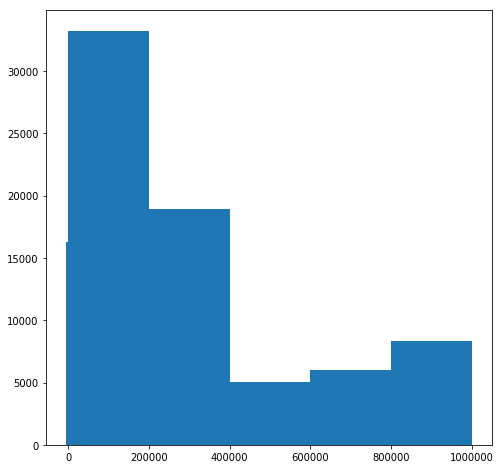

In [22]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (8,8))
plt.hist(demograph_df['Est_Net_worth'], bins = [-5000, 0, 200000, 400000, 600000, 800000, 1000000])
plt.show()

In [29]:
demograph_df.describe()

,AGE,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Length_residence,Num_person_household,Pct_above_poverty_line,Pct_below_poverty_line
count,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000,87821.000000
mean,73.026429,231753.794650,57525.176211,53.313319,59.048143,16.717471,2.424363,87.814270,12.092666
std,9.455213,292006.317591,47507.449024,27.856532,25.702810,19.276856,1.723129,9.942013,9.631543
min,40.000000,-2500.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,68.000000,2500.000000,25000.000000,30.000000,38.000000,5.000000,1.000000,83.000000,5.000000
50%,73.000000,125000.000000,45000.000000,54.000000,61.000000,13.000000,2.000000,90.000000,10.000000
75%,79.000000,312500.000000,87500.000000,78.000000,82.000000,19.000000,3.000000,95.000000,17.000000
max,95.000000,1000000.000000,500000.000000,99.000000,99.000000,99.000000,17.000000,99.000000,89.000000


In [30]:
dummy_df = pd.get_dummies(demograph_df, columns=cat_cols)

In [36]:
dummy_df.shape

(87821, 42)

In [123]:
col_idx = range(len(dummy_df.columns.values))

In [126]:
pd.Series(dummy_df.columns.values)

0                               AGE
1                     Est_Net_worth
2                        Est_income
3     Population_density_centile_ST
4     Population_density_centile_US
5                  Length_residence
6              Num_person_household
7            Pct_above_poverty_line
8            Pct_below_poverty_line
9                       College_0.0
10                      College_1.0
11             Online_purchaser_0.0
12             Online_purchaser_1.0
13                  Online_User_0.0
14                  Online_User_1.0
15                  Dwelling_Type_A
16                  Dwelling_Type_B
17                  Dwelling_Type_C
18                  Dwelling_Type_M
19                  Dwelling_Type_N
20                  Dwelling_Type_P
21                  Dwelling_Type_S
22                  Dwelling_Type_T
23              Education_level_0.0
24              Education_level_1.0
25              Education_level_2.0
26              Education_level_3.0
27              Education_le

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(dummy_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_X = sc.transform(dummy_df)

In [151]:
pca.explained_variance_ratio_

array([9.62902266e-02, 7.23202268e-02, 5.67599555e-02, 5.01387414e-02,
       4.82201973e-02, 4.78132747e-02, 4.61979364e-02, 4.28869766e-02,
       4.23316891e-02, 3.92452204e-02, 3.62910557e-02, 2.92380291e-02,
       2.67001657e-02, 2.57931413e-02, 2.44311258e-02, 2.43002747e-02,
       2.41823742e-02, 2.40454252e-02, 2.39483076e-02, 2.38347392e-02,
       2.38107007e-02, 2.37921218e-02, 2.36706809e-02, 2.31374675e-02,
       2.14137686e-02, 2.02327483e-02, 1.91016737e-02, 1.83012243e-02,
       1.24389153e-02, 6.51531875e-03, 2.54827280e-03, 6.80242020e-05,
       3.03824628e-32, 8.12126182e-33, 4.91258495e-33, 3.85672779e-33,
       2.28645272e-33, 1.30972478e-33, 5.91888533e-34, 5.36655574e-34,
       5.36655574e-34, 1.32475855e-35])

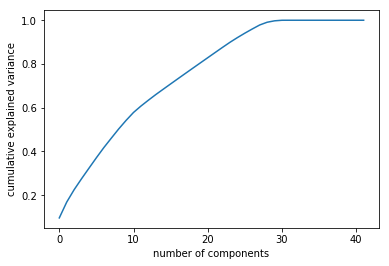

In [40]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [147]:
pca.explained_variance_ratio_

array([9.62902266e-02, 7.23202268e-02, 5.67599555e-02, 5.01387414e-02,
       4.82201973e-02, 4.78132747e-02, 4.61979364e-02, 4.28869766e-02,
       4.23316891e-02, 3.92452204e-02, 3.62910557e-02, 2.92380291e-02,
       2.67001657e-02, 2.57931413e-02, 2.44311258e-02, 2.43002747e-02,
       2.41823742e-02, 2.40454252e-02, 2.39483076e-02, 2.38347392e-02,
       2.38107007e-02, 2.37921218e-02, 2.36706809e-02, 2.31374675e-02,
       2.14137686e-02, 2.02327483e-02, 1.91016737e-02, 1.83012243e-02,
       1.24389153e-02, 6.51531875e-03, 2.54827280e-03, 6.80242020e-05,
       3.03824628e-32, 8.12126182e-33, 4.91258495e-33, 3.85672779e-33,
       2.28645272e-33, 1.30972478e-33, 5.91888533e-34, 5.36655574e-34,
       5.36655574e-34, 1.32475855e-35])

In [41]:
## Something around 25 would explain 90%of variation, so n_comp for pca = 25

In [42]:
pca_25 = PCA(n_components=25).fit(scaled_X)


In [45]:
pcs = pca_25.transform(scaled_X)

In [47]:
pcs

array([[-2.51555185,  1.06346602,  1.09449429, ..., -0.07996877,
         0.08240949,  0.56397794],
       [ 0.71037146,  3.23145775, -0.04359604, ..., -0.60871356,
        -4.87453096, -0.55278388],
       [-2.48978559, -0.84602645,  4.37312615, ..., -0.02328143,
        -0.29172534,  1.3018374 ],
       ...,
       [-0.75295887, -2.65566651,  0.14220798, ...,  0.10344508,
         0.83011299, -1.2583906 ],
       [-0.18162627, -2.37311276,  0.93768459, ..., -0.26865434,
        -0.8517498 , -1.22412435],
       [ 2.30430405,  3.96381592,  1.35182306, ...,  0.12065551,
         0.12153221,  0.15754549]])

In [88]:
loadings = pca_25.components_

In [89]:
loadings[1]

array([-3.72415224e-02, -3.15593564e-01, -3.21030501e-01, -4.73909201e-02,
       -3.06268535e-02,  4.57582580e-02, -1.28355001e-01, -3.22866646e-01,
        3.23646920e-01,  1.73686770e-01, -1.73686770e-01,  1.87912341e-01,
       -1.87912341e-01,  2.45298310e-01, -2.45298310e-01,  1.34454358e-01,
        2.90147272e-02,  7.25942956e-03,  6.25174417e-05,  1.82043404e-02,
        1.02853380e-01, -1.85068571e-01,  4.39768042e-02,  3.34269509e-02,
        8.29900608e-03,  3.56538222e-02,  2.57731574e-01, -1.19555184e-01,
       -1.13610199e-01, -1.58725628e-01, -8.66870210e-03, -4.96554662e-04,
        7.19461527e-02, -7.19461527e-02, -1.98717920e-02,  1.98717920e-02,
       -1.16004573e-02,  1.16004573e-02, -3.60398010e-02,  3.60398010e-02,
       -2.37152157e-01,  2.37152157e-01])

In [115]:
com = 1

In [116]:
loadings_list = list(loadings[com])
#abs_loadings = map(abs, loadings_list)

In [117]:
abs_loadings = [abs(i) for i in loadings_list ]

In [118]:
abs_loadings

[0.17359102748853453,
 0.21068095385040586,
 0.14752952149952336,
 0.08709635573020626,
 0.11643684640192424,
 0.012704444075687011,
 0.20339099397182275,
 0.22936160007073333,
 0.23239469303162424,
 0.20430545388169746,
 0.20430545388169746,
 0.3794631429982988,
 0.3794631429982986,
 0.32236987119725885,
 0.32236987119725885,
 0.1020755572347481,
 0.008169181529729043,
 0.04354292135451335,
 0.002389612212822876,
 0.02240927909022041,
 0.022681346157091553,
 0.08332880074351795,
 0.0019274906932132047,
 0.014800792765823117,
 0.0009286751239019467,
 0.02219747900428073,
 0.2526786333247284,
 0.13184746245240456,
 0.09371097858168673,
 0.14000818752392116,
 0.014456944858543931,
 0.005146836602654479,
 0.005047704141530037,
 0.005047704141530037,
 0.021756602477580104,
 0.021756602477580097,
 0.021210056091868927,
 0.02121005609186887,
 0.006075589472878482,
 0.006075589472878482,
 0.10543220181534235,
 0.10543220181534232]

In [119]:
##loadings_list
sorted_loadings_pc1 = sorted(range(len(loadings_list)), key=lambda k: abs_loadings[k], reverse=True)

In [120]:
sorted_loadings_pc1

[11,
 12,
 13,
 14,
 26,
 8,
 7,
 1,
 9,
 10,
 6,
 0,
 2,
 29,
 27,
 4,
 40,
 41,
 15,
 28,
 3,
 21,
 17,
 20,
 19,
 25,
 34,
 35,
 36,
 37,
 23,
 30,
 5,
 16,
 38,
 39,
 31,
 32,
 33,
 18,
 22,
 24]

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [54]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(pcs)
    #kmeanModel.fit(pcs)
    distortions.append(sum(np.min(cdist(pcs, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pcs.shape[0])

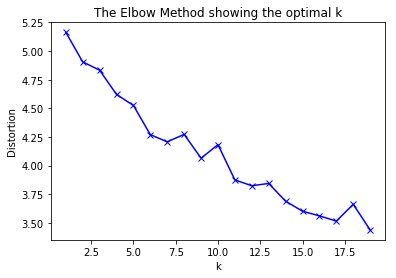

In [55]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [51]:
## Based on the graph above, 7 is fine I believe

In [56]:
kmeans_7 = KMeans(n_clusters=7).fit(scaled_X)


In [59]:
demograph_df['clusterNo'] = kmeans_7.labels_

In [60]:
demograph_df

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type,clusterNo
0,77,F,N,N,N,N,87500.0,87500.0,70.0,84.0,4.0,13.0,3.0,1.0,0.0,1.0,94.0,6.0,S,5
1,49,F,N,N,N,N,-2500.0,7500.0,83.0,86.0,3.0,3.0,3.0,0.0,1.0,1.0,86.0,14.0,T,0
2,75,F,N,N,N,N,625000.0,112000.0,30.0,30.0,6.0,8.0,1.0,1.0,0.0,1.0,95.0,5.0,A,5
3,68,M,N,N,N,N,-2500.0,55000.0,16.0,18.0,3.0,1.0,1.0,0.0,0.0,1.0,90.0,10.0,S,6
5,72,F,N,N,N,N,87500.0,55000.0,28.0,38.0,4.0,15.0,3.0,0.0,0.0,1.0,87.0,13.0,S,1
6,73,F,N,N,N,N,15000.0,87500.0,14.0,33.0,4.0,11.0,2.0,0.0,0.0,0.0,99.0,1.0,S,1
7,69,M,N,N,N,N,200000.0,35000.0,87.0,76.0,4.0,21.0,2.0,0.0,0.0,0.0,95.0,5.0,P,2
8,71,M,N,N,N,N,125000.0,55000.0,79.0,86.0,4.0,10.0,2.0,0.0,0.0,1.0,79.0,21.0,S,1
9,78,M,N,N,N,N,15000.0,67500.0,78.0,85.0,4.0,56.0,1.0,0.0,0.0,0.0,92.0,8.0,S,1
11,40,M,N,N,N,N,-2500.0,7500.0,1.0,28.0,3.0,0.0,6.0,0.0,0.0,1.0,62.0,38.0,S,6


In [62]:
demograph_df['clusterNo'].value_counts()

1    26818
6    26695
0    12413
3    10371
5     6653
2     4399
4      472
Name: clusterNo, dtype: int64

In [67]:
clust_4 = demograph_df.loc[demograph_df['clusterNo'] == 4]

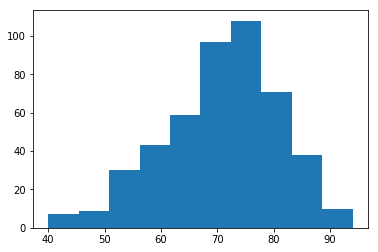

In [68]:
plt.hist(clust_4['AGE'])
plt.show()

In [69]:
clust6 = demograph_df.loc[demograph_df['clusterNo'] == 6]

In [71]:
clust6

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type,clusterNo
3,68,M,N,N,N,N,-2500.0,55000.0,16.0,18.0,3.0,1.0,1.0,0.0,0.0,1.0,90.0,10.0,S,6
11,40,M,N,N,N,N,-2500.0,7500.0,1.0,28.0,3.0,0.0,6.0,0.0,0.0,1.0,62.0,38.0,S,6
17,91,M,N,N,N,N,-2500.0,35000.0,1.0,2.0,4.0,99.0,1.0,0.0,0.0,0.0,48.0,52.0,A,6
19,90,M,N,N,N,N,200000.0,55000.0,52.0,75.0,3.0,19.0,2.0,0.0,0.0,0.0,96.0,4.0,S,6
20,74,M,N,N,Y,Y,-2500.0,7500.0,82.0,95.0,3.0,99.0,1.0,0.0,0.0,0.0,88.0,12.0,S,6
22,71,M,N,N,N,N,312500.0,67500.0,86.0,89.0,3.0,19.0,2.0,0.0,0.0,1.0,83.0,17.0,S,6
23,54,M,N,N,N,Y,37500.0,87500.0,80.0,89.0,3.0,9.0,4.0,0.0,0.0,1.0,92.0,8.0,S,6
27,68,F,N,N,N,N,-2500.0,55000.0,99.0,97.0,3.0,1.0,2.0,0.0,0.0,0.0,85.0,15.0,S,6
29,86,F,N,N,N,N,200000.0,45000.0,35.0,49.0,3.0,19.0,3.0,0.0,0.0,0.0,96.0,4.0,S,6
35,63,M,N,N,N,Y,-2500.0,17500.0,67.0,61.0,3.0,5.0,1.0,0.0,0.0,0.0,77.0,23.0,S,6


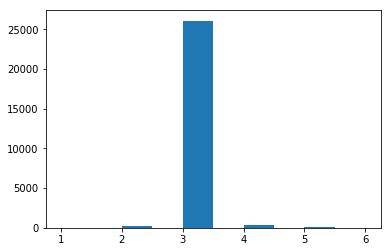

In [72]:
plt.hist(clust6['Education_level'])
plt.show()

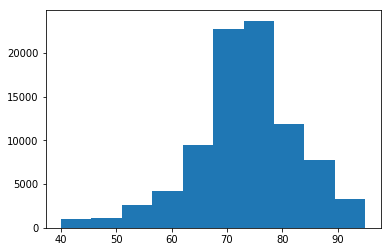

In [73]:
plt.hist(demograph_df['AGE'])
plt.show()

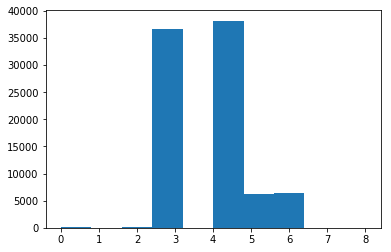

In [74]:
plt.hist(demograph_df['Education_level'])
plt.show()

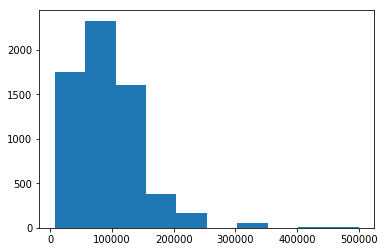

In [75]:
plt.hist(demograph_df.loc[(demograph_df['Education_level'] == 5),'Est_income'])
plt.show()

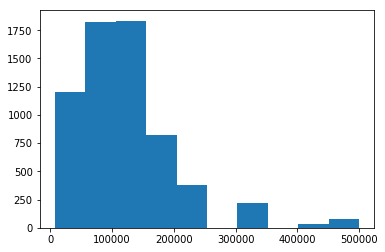

In [76]:
plt.hist(demograph_df.loc[(demograph_df['Education_level'] == 6),'Est_income'])
plt.show()

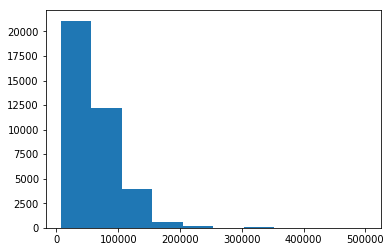

In [78]:
plt.hist(demograph_df.loc[(demograph_df['Education_level'] == 4),'Est_income'])
plt.show()

In [80]:
demograph_df[demograph_df['Est_Net_worth'] <0].head()

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type,clusterNo
1,49,F,N,N,N,N,-2500.0,7500.0,83.0,86.0,3.0,3.0,3.0,0.0,1.0,1.0,86.0,14.0,T,0
3,68,M,N,N,N,N,-2500.0,55000.0,16.0,18.0,3.0,1.0,1.0,0.0,0.0,1.0,90.0,10.0,S,6
11,40,M,N,N,N,N,-2500.0,7500.0,1.0,28.0,3.0,0.0,6.0,0.0,0.0,1.0,62.0,38.0,S,6
12,67,F,N,N,N,N,-2500.0,7500.0,13.0,32.0,4.0,1.0,1.0,0.0,1.0,1.0,78.0,22.0,S,0
13,63,F,N,N,N,Y,-2500.0,7500.0,89.0,92.0,3.0,4.0,1.0,1.0,1.0,1.0,78.0,22.0,S,5


In [130]:
df.shape

(100000, 448)

In [131]:
df =df[~pd.isnull(df['Est_Net_worth'])]

In [132]:
df['SEX_CD'] = df['SEX_CD'].fillna('F')
df['ESRD_IND'] = df['ESRD_IND'].fillna('N')
df['HOSPICE_IND'] = df['HOSPICE_IND'].fillna('N')
df['INSTITUTIONAL'] = df['INSTITUTIONAL'].fillna('N')
df['LIS'] = df['LIS'].fillna('N')

In [133]:
df.shape

(87821, 448)

In [134]:
demograph_df.shape

(87821, 20)

In [135]:
demograph_df['AMI'] = df['AMI_FLAG']

In [137]:
AMI_1 = demograph_df[demograph_df['AMI'] == 1]

In [141]:
AMI_1

,AGE,SEX_CD,ESRD_IND,HOSPICE_IND,INSTITUTIONAL,LIS,Est_Net_worth,Est_income,Population_density_centile_ST,Population_density_centile_US,Education_level,Length_residence,Num_person_household,College,Online_purchaser,Online_User,Pct_above_poverty_line,Pct_below_poverty_line,Dwelling_Type,clusterNo,AMI
9,78,M,N,N,N,N,15000.0,67500.0,78.0,85.0,4.0,56.0,1.0,0.0,0.0,0.0,92.0,8.0,S,1,1
157,69,F,N,N,N,N,125000.0,45000.0,87.0,84.0,3.0,19.0,1.0,0.0,0.0,1.0,85.0,15.0,S,6,1
199,75,F,N,N,N,N,15000.0,17500.0,36.0,54.0,3.0,11.0,2.0,0.0,0.0,0.0,86.0,14.0,S,6,1
240,77,F,N,N,N,N,62500.0,67500.0,23.0,58.0,4.0,5.0,2.0,0.0,1.0,1.0,85.0,15.0,S,0,1
279,84,F,N,N,N,N,312500.0,87500.0,75.0,83.0,3.0,19.0,4.0,0.0,0.0,1.0,76.0,24.0,S,6,1
298,80,F,N,N,N,N,437500.0,87500.0,61.0,68.0,4.0,9.0,3.0,0.0,0.0,1.0,99.0,1.0,S,1,1
365,75,F,N,N,N,N,437500.0,87500.0,76.0,81.0,6.0,24.0,2.0,0.0,1.0,1.0,96.0,4.0,S,0,1
445,80,F,N,N,N,N,37500.0,67500.0,30.0,30.0,3.0,7.0,8.0,0.0,0.0,1.0,85.0,15.0,S,6,1
453,56,M,N,N,N,N,437500.0,137500.0,57.0,47.0,6.0,1.0,2.0,0.0,0.0,1.0,91.0,9.0,S,3,1
500,67,M,N,N,N,N,-2500.0,7500.0,3.0,20.0,3.0,2.0,2.0,0.0,0.0,0.0,65.0,35.0,S,6,1


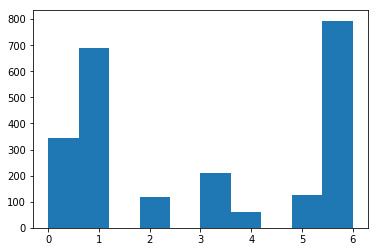

In [139]:
plt.hist(AMI_1['clusterNo'])
plt.show()

In [142]:
AMI_0 = demograph_df[demograph_df['AMI'] == 0]

In [143]:
AMI_0['clusterNo'].value_counts()

1    26128
6    25901
0    12067
3    10162
5     6528
2     4282
4      412
Name: clusterNo, dtype: int64

In [144]:
AMI_1['clusterNo'].value_counts()

6    794
1    690
0    346
3    209
5    125
2    117
4     60
Name: clusterNo, dtype: int64

## AMI vs diseases person is diagnosed in 2016

In [6]:
ami_1.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,DUAL,INSTITUTIONAL,LIS,MCO_HLVL_PLAN_CD,MCO_PROD_TYPE_CD,CON_VISIT_04_Q01,CON_VISIT_04_Q02,CON_VISIT_04_Q03,CON_VISIT_04_Q04,CON_VISIT_21_Q01,CON_VISIT_21_Q02,CON_VISIT_21_Q03,CON_VISIT_03_Q02,CON_VISIT_03_Q04,CON_VISIT_05_Q02,CON_VISIT_05_Q04,CON_VISIT_09_Q02,CON_VISIT_10_Q02,CON_VISIT_18_Q02,CON_VISIT_19_Q04,CON_VISIT_23_Q02,CON_VISIT_24_Q02,CON_VISIT_30_Q01,CON_VISIT_30_Q02,CON_VISIT_30_Q04,CON_VISIT_32_Q02,CON_VISIT_33_Q04,CON_VISIT_06_Q01,CON_VISIT_06_Q02,CON_VISIT_06_Q03,CON_VISIT_10_Q01,CON_VISIT_19_Q03,CON_VISIT_33_Q02,CON_VISIT_08_Q02,CON_VISIT_10_Q03,CON_VISIT_10_Q04,CON_VISIT_24_Q04,CON_VISIT_08_Q01,CON_VISIT_08_Q03,CON_VISIT_08_Q04,CON_VISIT_11_Q04,CON_VISIT_21_Q04,CON_VISIT_25_Q01,CON_VISIT_27_Q02,CON_VISIT_27_Q03,CON_VISIT_31_Q02,CON_VISIT_31_Q04,CON_VISIT_32_Q01,CON_VISIT_09_Q03,CON_VISIT_31_Q01,CON_VISIT_33_Q01,CON_VISIT_24_Q03,CON_VISIT_06_Q04,CON_VISIT_33_Q03,CON_VISIT_23_Q01,CON_VISIT_25_Q04,CON_VISIT_27_Q01,CON_VISIT_32_Q04,CON_VISIT_24_Q01,CON_VISIT_07_Q04,CON_VISIT_19_Q01,CON_VISIT_01_Q01,CON_VISIT_01_Q02,CON_VISIT_01_Q03,CON_VISIT_01_Q04,CON_VISIT_02_Q01,CON_VISIT_03_Q01,CON_VISIT_11_Q01,CON_VISIT_11_Q03,CON_VISIT_17_Q03,CON_VISIT_18_Q01,CON_VISIT_26_Q02,CON_VISIT_05_Q01,CON_VISIT_09_Q01,CON_VISIT_15_Q04,CON_VISIT_25_Q03,CON_VISIT_32_Q03,CON_VISIT_17_Q04,CON_VISIT_31_Q03,CON_VISIT_02_Q04,CON_VISIT_17_Q01,CON_VISIT_17_Q02,CON_VISIT_18_Q04,CON_VISIT_20_Q04,CON_VISIT_26_Q01,CON_VISIT_26_Q03,CON_VISIT_27_Q04,CON_VISIT_30_Q03,CON_VISIT_23_Q04,CON_VISIT_19_Q02,CON_VISIT_07_Q03,CON_VISIT_09_Q04,CON_VISIT_23_Q03,CON_VISIT_15_Q01,CON_VISIT_15_Q02,CON_VISIT_15_Q03,CON_VISIT_26_Q04,CON_VISIT_02_Q02,CON_VISIT_03_Q03,CON_VISIT_18_Q03,CON_VISIT_05_Q03,CON_VISIT_22_Q01,CON_VISIT_22_Q02,CON_VISIT_22_Q03,CON_VISIT_02_Q03,CON_VISIT_11_Q02,CON_VISIT_20_Q02,CON_VISIT_20_Q03,CON_VISIT_25_Q02,CON_VISIT_07_Q01,CON_VISIT_28_Q02,CON_VISIT_07_Q02,CON_VISIT_20_Q01,CON_VISIT_22_Q04,CON_VISIT_28_Q03,CON_VISIT_14_Q03,CON_VISIT_14_Q02,CON_VISIT_16_Q01,CON_VISIT_16_Q02,CON_VISIT_16_Q03,CON_VISIT_16_Q04,CON_VISIT_28_Q01,CON_VISIT_14_Q01,CON_VISIT_14_Q04,CON_VISIT_12_Q04,CON_VISIT_28_Q04,CON_VISIT_12_Q03,CON_VISIT_12_Q01,CON_VISIT_13_Q01,CON_VISIT_13_Q04,CON_VISIT_12_Q02,CON_VISIT_13_Q02,CON_VISIT_13_Q03,POT_VISIT_11_Q01,POT_VISIT_11_Q02,POT_VISIT_11_Q03,POT_VISIT_11_Q04,POT_VISIT_81_Q01,POT_VISIT_21_Q02,POT_VISIT_23_Q02,POT_VISIT_81_Q02,POT_VISIT_81_Q04,POT_VISIT_22_Q02,POT_VISIT_12_Q02,POT_VISIT_19_Q02,POT_VISIT_22_Q03,POT_VISIT_22_Q04,POT_VISIT_12_Q01,POT_VISIT_12_Q03,POT_VISIT_12_Q04,POT_VISIT_22_Q01,POT_VISIT_23_Q01,POT_VISIT_23_Q03,POT_VISIT_81_Q03,POT_VISIT_23_Q04,POT_VISIT_19_Q01,POT_VISIT_19_Q04,POT_VISIT_20_Q01,POT_VISIT_21_Q04,POT_VISIT_41_Q04,POT_VISIT_19_Q03,POT_VISIT_21_Q01,POT_VISIT_31_Q01,POT_VISIT_31_Q02,POT_VISIT_31_Q03,POT_VISIT_31_Q04,POT_VISIT_32_Q01,POT_VISIT_32_Q02,POT_VISIT_32_Q03,POT_VISIT_32_Q04,POT_VISIT_41_Q01,POT_VISIT_51_Q01,POT_VISIT_51_Q02,POT_VISIT_24_Q02,POT_VISIT_21_Q03,POT_VISIT_41_Q02,POT_VISIT_41_Q03,POT_VISIT_53_Q01,POT_VISIT_53_Q02,POT_VISIT_53_Q03,POT_VISIT_53_Q04,POT_VISIT_20_Q02,POT_VISIT_20_Q04,POT_VISIT_01_Q03,POT_VISIT_17_Q04,POT_VISIT_20_Q03,POT_VISIT_24_Q03,POT_VISIT_24_Q04,POT_VISIT_24_Q01,POT_VISIT_50_Q01,POT_VISIT_50_Q02,POT_VISIT_50_Q03,POT_VISIT_50_Q04,POT_VISIT_72_Q01,POT_VISIT_72_Q02,POT_VISIT_72_Q03,POT_VISIT_17_Q01,POT_VISIT_15_Q04,POT_VISIT_99_Q03,POT_VISIT_99_Q04,POT_VISIT_34_Q01,POT_VISIT_42_Q02,POT_VISIT_61_Q03,POT_VISIT_51_Q04,POT_VISIT_72_Q04,POT_VISIT_49_Q03,POT_VISIT_02_Q04,POT_VISIT_99_Q01,POT_VISIT_99_Q02,POT_VISIT_49_Q01,POT_VISIT_49_Q02,POT_VISIT_15_Q01,POT_VISIT_60_Q04,POT_VISIT_33_Q03,POT_VISIT_33_Q01,POT_VISIT_13_Q01,POT_VISIT_13_Q02,POT_VISIT_13_Q03,POT_VISIT_13_Q04,POT_VISIT_65_Q02,POT_VISIT_65_Q03,POT_VISIT_65_Q04,POT_VISIT_49_Q04,POT_VISIT_65_Q01,POT_VISIT_33_Q04,POT_VISIT_15_Q03,POT_VISIT_61_Q02,POT_VISIT_17_Q03,POT_VISIT_33_Q02,POT_VI

In [7]:
cols = ami_1.columns.values

In [33]:
cols_idx = pd.Series(cols)

In [41]:
cols_idx[388:413]

388                CV_CAD
389                CV_CHF
390                CV_CIR
391                CV_CER
392                CV_HDZ
393                CV_SNS
394                CV_PVD
395               RES_ALG
396               RES_AST
397              RES_COPD
398              RES_FAIL
399               RES_INF
400              DIABETES
401             Diab_Type
402    Diab_Complications
403           PREDIABETES
404          HYPERTENSION
405            HYPERLIPID
406                 RENAL
407                   CKD
408                  ESRD
409            MUSCUL_OTH
410             MUSCUL_BN
411                 OSTEO
412                  ARTH
dtype: object

In [42]:
#list(col_interested)
col_interested = cols_idx[388:413]

In [78]:
df_diseases = df[col_interested]

In [79]:
df_diseases['AMI_FLAG'] = df['AMI_FLAG']

C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
df_diseases.shape

(100000, 26)

In [48]:
df_diseases.isnull().sum()

CV_CAD                    0
CV_CHF                    0
CV_CIR                    0
CV_CER                    0
CV_HDZ                    0
CV_SNS                    0
CV_PVD                    0
RES_ALG                   0
RES_AST                   0
RES_COPD                  0
RES_FAIL                  0
RES_INF                   0
DIABETES                  0
Diab_Type             64693
Diab_Complications        0
PREDIABETES               0
HYPERTENSION              0
HYPERLIPID                0
RENAL                     0
CKD                       0
ESRD                      0
MUSCUL_OTH                0
MUSCUL_BN                 0
OSTEO                     0
ARTH                      0
AMI_FLAG                  0
dtype: int64

In [81]:
df_diseases.drop('Diab_Type', inplace=True, axis =1)

C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
df_diseases = df_diseases[~pd.isnull(df_diseases['Diab_Type'])]

In [82]:
df_diseases.shape

(100000, 25)

In [62]:
df_diseases_dummy = pd.get_dummies(df_diseases)

In [84]:
from sklearn.ensemble import RandomForestClassifier


In [89]:
#Y = df_diseases.pop('AMI_FLAG')

In [86]:
df_diseases.shape

(100000, 24)

In [63]:
df_diseases['Diab_Type'].value_counts()

Diabetes Type II    30091
Diabetes Unspeci     2854
Diabetes Type I      2362
Name: Diab_Type, dtype: int64

In [90]:
mod = RandomForestClassifier()
mod.fit(df_diseases, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
df_diseases.head()

,CV_CAD,CV_CHF,CV_CIR,CV_CER,CV_HDZ,CV_SNS,CV_PVD,RES_ALG,RES_AST,RES_COPD,RES_FAIL,RES_INF,DIABETES,Diab_Complications,PREDIABETES,HYPERTENSION,HYPERLIPID,RENAL,CKD,ESRD,MUSCUL_OTH,MUSCUL_BN,OSTEO,ARTH
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [92]:
d = {}
for k in range(df_diseases.shape[1]):
    #print(df_diseases_dummy.columns.values[k], " : ",mod.feature_importances_[k])
    d[df_diseases.columns.values[k]] = mod.feature_importances_[k]

#d_sort = sorted(d, lambda x: )
sorted_d = sorted(d.items(), key=lambda x: x[1], reverse=True)
sorted_d


[('MUSCUL_BN', 0.07481028963446663),
 ('HYPERLIPID', 0.06821063170061288),
 ('ARTH', 0.06688726132178775),
 ('CV_CER', 0.06245790825278095),
 ('RES_INF', 0.061888325998950486),
 ('RES_COPD', 0.05791247748893941),
 ('CV_SNS', 0.046967403463867054),
 ('RES_FAIL', 0.0463702109582992),
 ('RES_ALG', 0.04509891406910246),
 ('CV_CIR', 0.04488926533429186),
 ('CV_HDZ', 0.043467447561892456),
 ('RES_AST', 0.04249426169086608),
 ('HYPERTENSION', 0.0420350987623392),
 ('CV_CAD', 0.04115284747240473),
 ('OSTEO', 0.040296277110645984),
 ('MUSCUL_OTH', 0.03454770597748855),
 ('PREDIABETES', 0.029598530102124865),
 ('CV_CHF', 0.02925787843262076),
 ('CV_PVD', 0.027516629411211257),
 ('Diab_Complications', 0.02537670899573562),
 ('DIABETES', 0.025214283704301056),
 ('CKD', 0.01811195609511134),
 ('RENAL', 0.015396617987694363),
 ('ESRD', 0.010041068472465064)]

In [96]:
df_diseases[df_diseases['AMI'] == 1].describe()

,CV_CAD,CV_CHF,CV_CIR,CV_CER,CV_HDZ,CV_SNS,CV_PVD,RES_ALG,RES_AST,RES_COPD,RES_FAIL,RES_INF,DIABETES,Diab_Complications,PREDIABETES,HYPERTENSION,HYPERLIPID,RENAL,CKD,ESRD,MUSCUL_OTH,MUSCUL_BN,OSTEO,ARTH,AMI
count,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.000000,2726.0
mean,0.519809,0.289435,0.646368,0.285767,0.542186,0.443140,0.092076,0.109318,0.088041,0.283566,0.165811,0.378210,0.504035,0.394351,0.099046,0.854365,0.694057,0.275128,0.274762,0.023478,0.058327,0.334189,0.069332,0.227806,1.0
std,0.499699,0.453583,0.478184,0.451862,0.498309,0.496848,0.289187,0.312095,0.283407,0.450811,0.371979,0.485029,0.500075,0.488800,0.298779,0.352804,0.460890,0.446661,0.446476,0.151443,0.234404,0.471793,0.254065,0.419494,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [97]:
df_diseases[df_diseases['AMI'] == 0].describe()

,CV_CAD,CV_CHF,CV_CIR,CV_CER,CV_HDZ,CV_SNS,CV_PVD,RES_ALG,RES_AST,RES_COPD,RES_FAIL,RES_INF,DIABETES,Diab_Complications,PREDIABETES,HYPERTENSION,HYPERLIPID,RENAL,CKD,ESRD,MUSCUL_OTH,MUSCUL_BN,OSTEO,ARTH,AMI
count,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.00000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.000000,97274.0
mean,0.206335,0.106421,0.441495,0.152045,0.311563,0.226268,0.040885,0.109042,0.078562,0.167866,0.068795,0.301077,0.348839,0.231881,0.154790,0.762917,0.68010,0.159950,0.159847,0.004277,0.067387,0.297911,0.073267,0.223534,0.0
std,0.404676,0.308377,0.496568,0.359066,0.463135,0.418417,0.198024,0.311694,0.269055,0.373749,0.253107,0.458729,0.476605,0.422036,0.361706,0.425296,0.46644,0.366562,0.366466,0.065256,0.250692,0.457343,0.260576,0.416615,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [105]:
pv = pd.pivot_table(df_diseases, columns = 'AMI', aggfunc='mean')
pv['diff'] = (pv[1]-pv[0])/pv[0]

In [106]:
pv

AMI,0,1,diff
ARTH,0.223534,0.227806,0.019115
CKD,0.159847,0.274762,0.718899
CV_CAD,0.206335,0.519809,1.519253
CV_CER,0.152045,0.285767,0.879491
CV_CHF,0.106421,0.289435,1.719717
CV_CIR,0.441495,0.646368,0.464044
CV_HDZ,0.311563,0.542186,0.740213
CV_PVD,0.040885,0.092076,1.252107
CV_SNS,0.226268,0.443140,0.958474
DIABETES,0.348839,0.504035,0.444892


In [28]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(figsize =(10,10))
corr_mat = df_diseases.corr()

In [107]:
#corr_mat.plot(figsize = (10,10))

## Modeling

In [ ]:

filter_col = [col.split('_')[2] for col in data if col.startswith('CON_VISIT_')]
filter_col_set = list(set([int(col,10) for col in filter_col]))


# In[4]:


condition = []
for i in filter_col_set:
    for j in range(1,5):
        temp = 'CON_VISIT_' + str(i).zfill(2) + "_Q" + str(j).zfill(2)  
        if (temp in data.columns):
            condition.append(temp)
            
for i in filter_col_set:
    for j in range(1,5):
        temp = 'CON_VISIT_' + str(i).zfill(2) + "_Q" + str(j).zfill(2)  
        if (temp in data.columns):
            data['risk_score'] = data['risk_score'] + data[temp]*(2**j)
            


In [120]:
condition_codes = [21,4,24,32,33]

def find_all_columns(cc, dataf):
    mystr = 'CON_VISIT_' + str(cc)
    filter_cols = [col for col in dataf if col.startswith(mystr)]
    return filter_cols

def create_weighted_features(col_list, dataf):
    dataf_res = np.zeros(len(dataf))
    for i in col_list:
        fac = float(i.split('_')[3][2])
        dataf_res = dataf_res + dataf[i]*2**fac
    return dataf_res

def make_features_condition_codes(condition_codes_list, dataf):
    df_res = pd.DataFrame()
    for j in condition_codes_list:
        c_list = find_all_columns(j, dataf)
        df_res[str(j)] = create_weighted_features(c_list, dataf)
    return df_res
        
    ### Data Prep
        
    
        
    
    
    

In [132]:
features = make_features_condition_codes(condition_codes, df)

In [133]:
features.head()

,21,4,24,32,33
0,24.0,0.0,0.0,0.0,0.0
1,0.0,0.0,92.0,16.0,0.0
2,0.0,0.0,0.0,0.0,8.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [134]:
cherry_columns = [315,
332,
333,
316,
299,
309,
302,
342]

In [135]:
for f in cherry_columns:
    features[str(f)]  = df.iloc[:, f]

In [137]:
features.head()

,21,4,24,32,33,315,332,333,316,299,309,302,342
0,24.0,0.0,0.0,0.0,0.0,0,0,0,0,6,0,1,0
1,0.0,0.0,92.0,16.0,0.0,0,0,0,0,0,5,10,0
2,0.0,0.0,0.0,0.0,8.0,0,0,0,0,7,5,0,0
3,0.0,0.0,0.0,0.0,0.0,4,0,0,3,4,5,0,0
4,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [138]:
df.columns.values

array(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT', 'DUAL',
       'INSTITUTIONAL', 'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD',
       'CON_VISIT_04_Q01', 'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03',
       'CON_VISIT_04_Q04', 'CON_VISIT_21_Q01', 'CON_VISIT_21_Q02',
       'CON_VISIT_21_Q03', 'CON_VISIT_03_Q02', 'CON_VISIT_03_Q04',
       'CON_VISIT_05_Q02', 'CON_VISIT_05_Q04', 'CON_VISIT_09_Q02',
       'CON_VISIT_10_Q02', 'CON_VISIT_18_Q02', 'CON_VISIT_19_Q04',
       'CON_VISIT_23_Q02', 'CON_VISIT_24_Q02', 'CON_VISIT_30_Q01',
       'CON_VISIT_30_Q02', 'CON_VISIT_30_Q04', 'CON_VISIT_32_Q02',
       'CON_VISIT_33_Q04', 'CON_VISIT_06_Q01', 'CON_VISIT_06_Q02',
       'CON_VISIT_06_Q03', 'CON_VISIT_10_Q01', 'CON_VISIT_19_Q03',
       'CON_VISIT_33_Q02', 'CON_VISIT_08_Q02', 'CON_VISIT_10_Q03',
       'CON_VISIT_10_Q04', 'CON_VISIT_24_Q04', 'CON_VISIT_08_Q01',
     

In [139]:
ashu_cols = ['PREDIABETES','DIABETES','CV_PVD', 'MUSCUL_OTH','OSTEO','CV_CHF', 'HYPERTENSION','RES_FAIL', \
            'CV_HDZ', 'RES_AST', 'CV_CAD','CV_CIR','CV_SNS','RES_ALG', 'CV_CER','RES_COPD', 'RES_INF','ARTH', \
            'HYPERLIPID', 'MUSCUL_BN']

In [140]:
for j in ashu_cols:
    features[j] = df[j]

In [141]:
features.shape

(100000, 33)

In [143]:
features.head()

,21,4,24,32,33,315,332,333,316,299,309,302,342,PREDIABETES,DIABETES,CV_PVD,MUSCUL_OTH,OSTEO,CV_CHF,HYPERTENSION,RES_FAIL,CV_HDZ,RES_AST,CV_CAD,CV_CIR,CV_SNS,RES_ALG,CV_CER,RES_COPD,RES_INF,ARTH,HYPERLIPID,MUSCUL_BN
0,24.0,0.0,0.0,0.0,0.0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,92.0,16.0,0.0,0,0,0,0,0,5,10,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0
2,0.0,0.0,0.0,0.0,8.0,0,0,0,0,7,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,4,0,0,3,4,5,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1


In [144]:
target = df['AMI_FLAG']

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [147]:
mod = RandomForestClassifier()
mod.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [150]:
from sklearn.cross_validation import cross_val_score
scores= []
for val in range(1,50,10):
    clf = RandomForestClassifier(n_estimators=val)
    validated = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
    scores.append(validated)

C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Preetika\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Preetika\Anaconda2\envs\py36\li

In [156]:
scores

[array([0.04102564, 0.04359673, 0.07103825, 0.07425743, 0.06282723,
        0.06770833, 0.08060453, 0.06419753, 0.03589744, 0.05913978]),
 array([0.01052632, 0.        , 0.        , 0.        , 0.        ,
        0.01075269, 0.02150538, 0.01069519, 0.        , 0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01058201, 0.        , 0.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [161]:
from sklearn.metrics import f1_score

In [162]:
def cut_off(clf, X, cutoff):
    return (clf.predict_proba(X)[:,0] > cutoff).astype(int)

scores =[]

def custom_f1(cutoff):
    def f1_cutoff(clf,X, y):
        ypred = cut_off(clf, X, cutoff)
        return f1_score(y,ypred)
    return f1_cutoff

for cutoff in np.arange(0.1, 0.9,0.1):
    clf = RandomForestClassifier(n_estimators=10)
    validated = cross_val_score(clf, X_train, y_train, cv =10, scoring=custom_f1(cutoff))
    scores.append(validated)

In [171]:
scores_df = pd.DataFrame(scores)
scores_df=scores_df.T

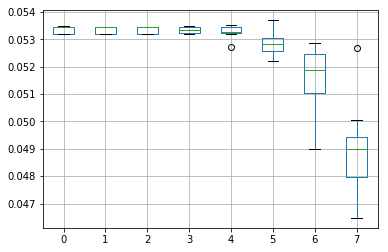

In [173]:
scores_df.boxplot()

In [174]:
### Doing with number four cutoff which is 
np.arange(0.1,0.9,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [175]:
features.to_csv('features_combined.csv')